Saving archive.zip to archive.zip
✅ Extracted: archive.zip
Data Loaded:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


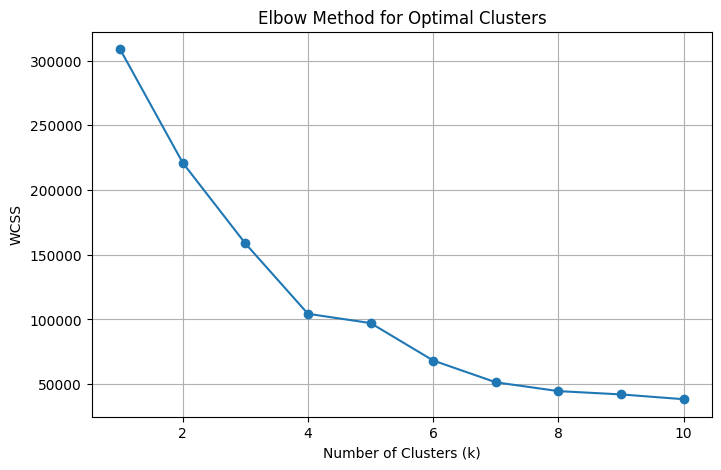

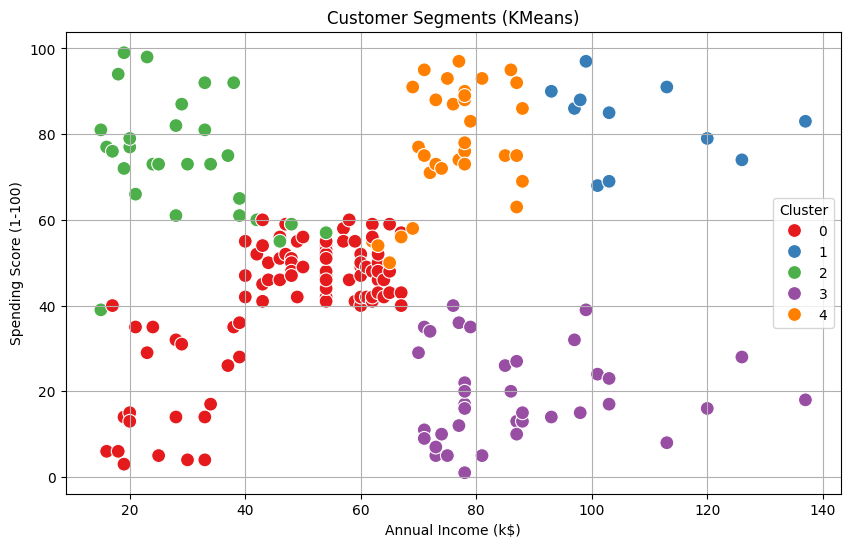


📊 Cluster Averages:
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.247191  0.382022  46.213483           47.719101   
1        190.000000  0.454545  32.454545          108.181818   
2         30.586207  0.482759  24.689655           29.586207   
3        162.000000  0.526316  40.394737           87.000000   
4        145.575758  0.454545  31.787879           76.090909   

         Spending Score (1-100)  
Cluster                          
0                     41.797753  
1                     82.727273  
2                     73.655172  
3                     18.631579  
4                     77.757576  


In [1]:
!pip install pandas matplotlib seaborn scikit-learn


from google.colab import files
import zipfile
import os

# Upload the ZIP file
uploaded = files.upload()

# Extract the ZIP
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall()  # Extract to current directory
        print(f" Extracted: {fn}")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


df = pd.read_csv('Mall_Customers.csv')
print("Data Loaded:")
print(df.head())


le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='Set1',
                s=100)
plt.title('Customer Segments (KMeans)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


print("\n📊 Cluster Averages:")
print(df.groupby('Cluster').mean(numeric_only=True))

